In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from dateutil import relativedelta
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [350]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df.date = pd.to_datetime(original_df['date']) ## datetime
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year
original_df.date = pd.DatetimeIndex(original_df['date'])
##days
start_date = datetime.datetime(2016,1,1)
original_df['days_since_purchase'] = start_date -original_df.date  ## days since last purchase for each purchase
original_df.head(3)

,customer_id,amount,date,month,year,days_since_purchase
0,760,25.0,2009-11-06,11,2009,2247 days
1,860,50.0,2012-09-28,9,2012,1190 days
2,1200,100.0,2005-10-25,10,2005,3720 days


In [351]:
#http://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [352]:
#Months
#original_df['months_since_purchase']=original_df.date.apply(lambda x: diff_month(start_date,x))
#Year
original_df['years_since_start']=original_df.date.apply(lambda x: diff_year(start_date,x))


In [353]:
## Get quarters (three months = 1 quarter)
#original_df['quarters_since_purchase'] = round(original_df.months_since_purchase/3)
#original_df['years_since_purchase'] = original_df['year'] - (original_df['year'].min()-1) #Joseph
#original_df = original_df[['customer_id', 'amount', 'years_since_purchase']]


In [410]:
#new_index = sorted(list(original_df.customer_id.unique()))
#new_index = list(map(lambda x: [[x,_] for _ in range(1,original_df.years_since_start.max()+1)], new_index))
new_index = list(original_df.customer_id)
new_index = unique(sorted(new_index))
new_index = pd.DataFrame([[x,y] for x in new_index for y in range(1,11)])
new_index = new_index.values.T
new_index = pd.MultiIndex.from_arrays(new_index)

x = original_df.set_index(["customer_id","years_since_start"])
x.reindex(new_index, fill_value=0)
#x[x.customer_id==80]

new_index



Exception: cannot handle a non-unique multi-index!

In [183]:
## Create indicators for our state
#original_df['state_one'] = original_df.years_since_purchase.apply(lambda x: 3-x) >=0
#original_df['state_two'] =  original_df.years_since_purchase.apply(lambda x: x>3 and x<=6)
#original_df['state_three'] =  original_df.years_since_purchase.apply(lambda x: x>6 and x<=9)

#Joseph
def state_logic(x):
    if 3-x >=0:
        return 1
    elif x>3 and x<=6:
        return 2
    elif x>6 and x<=9:
        return 3
    else:
        return 0
original_df['state'] = original_df.years_since_purchase.apply(state_logic)


In [184]:
original_df.head()

,customer_id,amount,years_since_purchase,state
0,760,25.0,5,2
1,860,50.0,8,3
2,1200,100.0,1,1
3,1420,50.0,5,2
4,1940,70.0,9,3


In [222]:
#original_df.sort_values(['days_since_purchase'],ascending=True)

In [41]:
## On average people make 2.78 purchases
print('Average purchases', np.mean(original_df.groupby(by=['customer_id']).count()['amount']))
# Median purcahses are 2.0
print('Median purchases',np.median(original_df.groupby(by=['customer_id']).count()['amount']))


Average purchases 2.7823749796383774
Median purchases 2.0


In [42]:
## Average number of months since purchase per customer id
avg_months_since_purchase_per_customer= original_df.groupby(by=['customer_id',])['months_since_purchase'].mean().reset_index()

In [43]:
print('Average months in-between purchases',np.mean(avg_months_since_purchase_per_customer.months_since_purchase))
print('Median number of months in-between purchases',np.median(avg_months_since_purchase_per_customer.months_since_purchase))

Average months in-between purchases 53.74982086989937
Median number of months in-between purchases 51.6666666667


In [44]:
print('Average quarters in-between purchases',np.mean(original_df.quarters_since_purchase))
print('Median number quarters in-between purchases',np.median(original_df.quarters_since_purchase))

Average quarters in-between purchases 17.982085358000116
Median number quarters in-between purchases 17.0


In [45]:
print('Average years in-between purchases',np.mean(original_df.years_since_purchase))
print('Median years quarters in-between purchases',np.median(original_df.years_since_purchase))

Average years in-between purchases 5.130300724001327
Median years quarters in-between purchases 5.0


In [46]:
truncated_avg_months_customer = avg_months_since_purchase_per_customer[avg_months_since_purchase_per_customer.months_since_purchase<150]

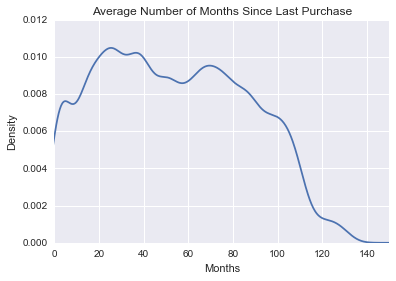

In [261]:
truncated_avg_months_customer.months_since_purchase.plot(kind='kde',xlim=[0,150], )
plt.title('Average Number of Months Since Last Purchase')
plt.xlabel('Months')

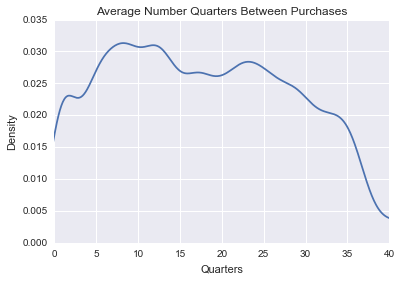

In [48]:
original_df.groupby(by=['customer_id'])['quarters_since_purchase'].mean().reset_index()['quarters_since_purchase'].plot(kind='kde',xlim=[0,40])
plt.title('Average Number Quarters Between Purchases')
plt.xlabel('Quarters')

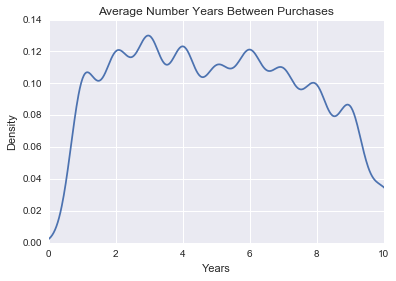

In [49]:
original_df.groupby(by=['customer_id'])['years_since_purchase'].mean().reset_index()['years_since_purchase'].plot(kind='kde',xlim=[0,10])
plt.title('Average Number Years Between Purchases')
plt.xlabel('Years')

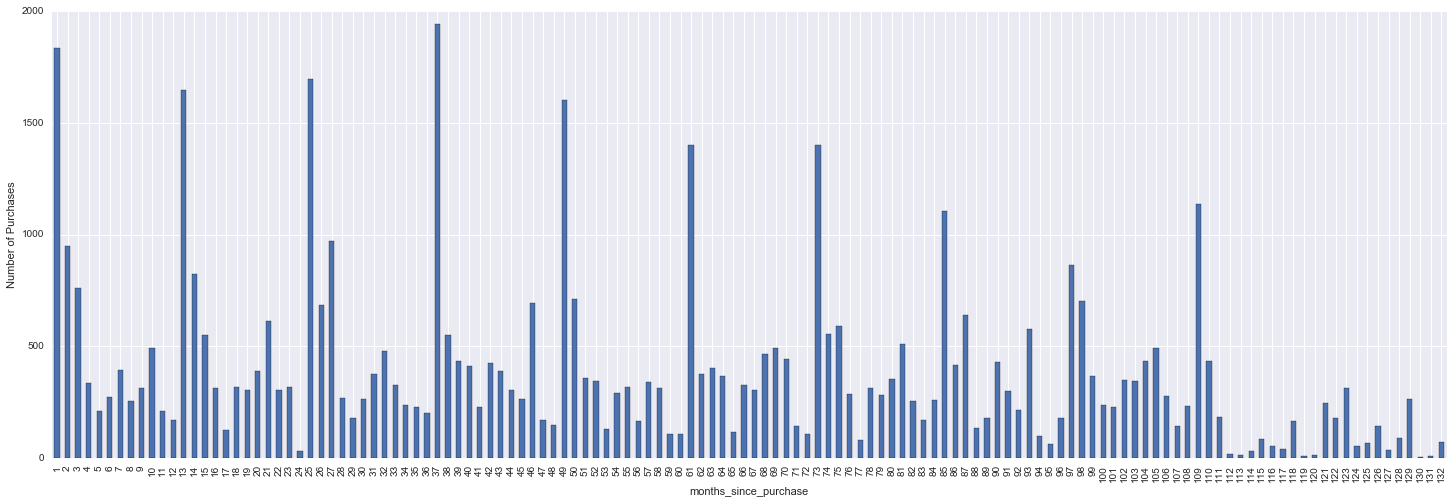

In [50]:
## Number of purchases per month total - not by unique customer id
original_df.groupby(by=['months_since_purchase']).count()['customer_id'].plot(kind='bar',figsize=([25,8]))
plt.ylabel('Number of Purchases')

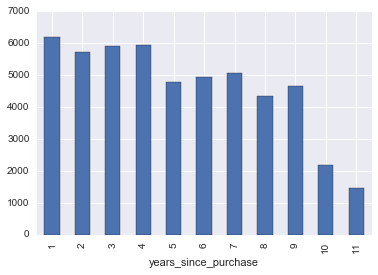

In [51]:
## Number of pruchases per year total - not by unique customer id
original_df.groupby(by=['years_since_purchase']).count()['customer_id'].plot(kind='bar')

In [52]:
cumulative_purchases_per_year = original_df.groupby(by=['years_since_purchase']).count()['customer_id'].apply(
lambda x: x/sum(original_df.groupby(by=['years_since_purchase']).count())).reset_index()

In [53]:
cumulative_purchases_per_year['running_total'] = cumulative_purchases_per_year.customer_id.cumsum()

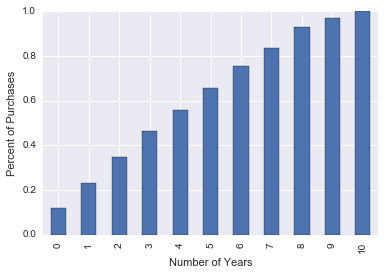

In [54]:
## Cumulative purchases over years

cumulative_purchases_per_year.running_total.plot(kind='bar')
plt.ylabel('Percent of Purchases')
plt.xlabel('Number of Years')

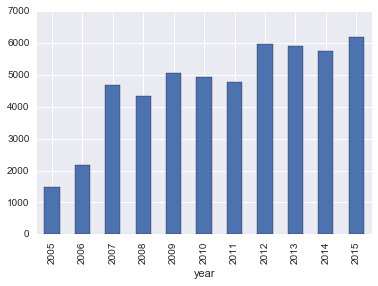

In [55]:
## Total number of purchases per year
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar')

## Based on the above analysis, let us define a state as 36 months or three years (slightly less than the average time between transactions of ~50 months)
- Therefore, we will have three states in our transition matrix up to year nine (cutting out years 10 and 11)
- State One : <=3 years
- State Two : >3 years <= 6 years
- State Three : > 6 years <= 9 years

> Drop records that are 10 or 11 years since purchase

In [223]:
## drop these 
original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)].head(10) # Joseph added .head() to limit to 10

AttributeError: 'DataFrame' object has no attribute 'state_one'

In [61]:
indexes_to_drop = original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)].index

In [62]:
indexes_to_drop

Int64Index([    2,     6,     8,    12,    16,    17,    19,    20,    22,
               23,
            ...
            51088, 51089, 51098, 51109, 51143, 51151, 51164, 51175, 51176,
            51186],
           dtype='int64', length=3652)

In [63]:
state_df = original_df.drop(original_df.index[indexes_to_drop])

In [64]:
## Confirm we dropped everything correctly
state_df[(state_df.state_one == False) &
            (state_df.state_two == False) &
                (state_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,quarters_since_purchase,state_one,state_two,state_three


In [224]:
state_df.groupby(['customer_id']).apply(sort_index())

NameError: name 'sort_index' is not defined

In [225]:
state_df[state_df.customer_id==80]

#Joseph - record # 46422 years since last purchase should be 0 since they haven't made one
#before??? is this right?

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,quarters_since_purchase,state_one,state_two,state_three
11457,80,80.0,2011-08-05,8,2011,1610 days,53,5,18.0,False,True,False
11657,80,80.0,2013-08-07,8,2013,877 days,29,3,10.0,True,False,False
15624,80,60.0,2007-04-18,4,2007,3180 days,105,9,35.0,False,False,True
16131,80,80.0,2015-01-23,1,2015,343 days,12,1,4.0,True,False,False
45074,80,80.0,2014-03-05,3,2014,667 days,22,2,7.0,True,False,False
46422,80,70.0,2009-04-10,4,2009,2457 days,81,7,27.0,False,False,True


In [69]:
unique_customer_id = state_df.customer_id.unique()
unique_customer_id[0]

760

In [70]:
## Check number of customers where state is in last state

number_in_state_one = 0
number_in_state_two = 0
number_in_state_three = 0
number_of_customers = len(unique_customer_id)

# get number in state one
for customer in unique_customer_id:
    if state_df.state_one[(state_df['customer_id']==customer)].any() == True:
        number_in_state_one +=1
    else:
        pass
# get number in state two
for customer in unique_customer_id:
    if state_df.state_two[(state_df['customer_id']==customer)].any() == True:
        number_in_state_two +=1
    else:
        pass
# get number of customer in state three

for customer in unique_customer_id:
    if state_df.state_three[(state_df['customer_id']==customer)].any() == True:
        number_in_state_three +=1
    else:
        pass

In [115]:
# state_df.groupby(['customer_id','state_one','state_two']).count().reset_index()[]
# Joseph did below
x = state_df.groupby(['customer_id','state_one','state_two', 'state_three', 'year']).count().reset_index()
x['year'] = x['year']-2006 #2007 is the 1st year
x = x[['customer_id', 'state_one', 'state_two', 'state_three', 'year']]
#x.head()
x.groupby(['year', 'state_one']).count()
x[x.customer_id==80]

,customer_id,state_one,state_two,state_three,year
0,80,False,False,True,1
1,80,False,False,True,3
2,80,False,True,False,5
3,80,True,False,False,7
4,80,True,False,False,8
5,80,True,False,False,9


In [ ]:
# number_in_state_one

In [ ]:
# state_df.state_three[(state_df['customer_id']==80)]

In [ ]:
# state_df.groupby('state_one').count()['customer_id']

In [ ]:
## determine state one to state one probability
# state_df.groupby('state_one').count()['customer_id']

In [81]:
# Joseph
state_df['year'].min()

2007